In [40]:
import numpy as np 

In [41]:
!pip install scikit-fuzzy 

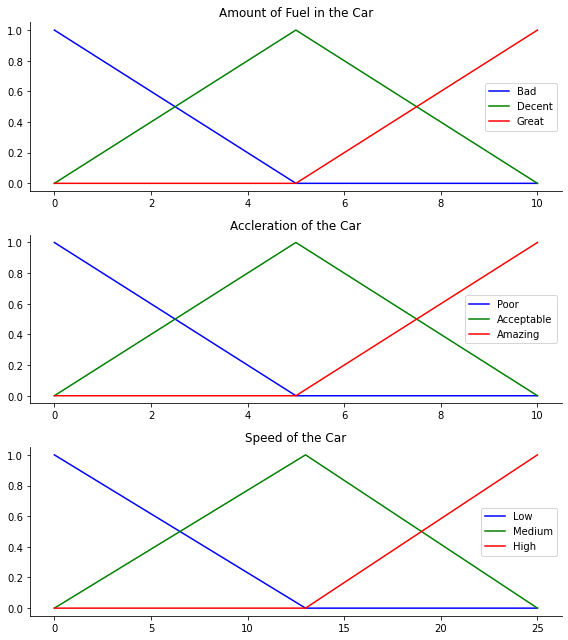

In [50]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_fuelamount = np.arange(0, 11, 1)
x_accleration = np.arange(0, 11, 1)
x_speed  = np.arange(0, 26, 1)

# Generate fuzzy membership functions
fuelamount_lo = fuzz.trimf(x_fuelamount, [0, 0, 5])
fuelamount_md = fuzz.trimf(x_fuelamount, [0, 5, 10])
fuelamount_hi = fuzz.trimf(x_fuelamount, [5, 10, 10])
accleration_lo = fuzz.trimf(x_accleration, [0, 0, 5])
accleration_md = fuzz.trimf(x_accleration, [0, 5, 10])
accleration_hi = fuzz.trimf(x_accleration, [5, 10, 10])
speed_lo = fuzz.trimf(x_speed, [0, 0, 13])
speed_md = fuzz.trimf(x_speed, [0, 13, 25])
speed_hi = fuzz.trimf(x_speed, [13, 25, 25])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_fuelamount, fuelamount_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_fuelamount, fuelamount_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_fuelamount, fuelamount_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Amount of Fuel in the Car')
ax0.legend()

ax1.plot(x_accleration, accleration_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_accleration, accleration_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_accleration, accleration_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Accleration of the Car')
ax1.legend()

ax2.plot(x_speed, speed_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_speed, speed_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_speed, speed_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Speed of the Car')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

0.8 0.2 0.0
0.8 0.2 0.0
0.8 0.0


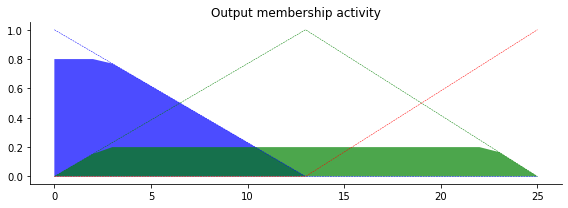

In [51]:
fo_qual=1
accleration_fuelamount=1
fuelamount_level_lo = fuzz.interp_membership(x_fuelamount, fuelamount_lo, fo_qual)
fuelamount_level_md = fuzz.interp_membership(x_fuelamount, fuelamount_md, fo_qual)
fuelamount_level_hi = fuzz.interp_membership(x_fuelamount, fuelamount_hi, fo_qual)
print(fuelamount_level_lo,fuelamount_level_md,fuelamount_level_hi)
accleration_level_lo = fuzz.interp_membership(x_accleration, accleration_lo, accleration_fuelamount)
accleration_level_md = fuzz.interp_membership(x_accleration, accleration_md, accleration_fuelamount)
accleration_level_hi = fuzz.interp_membership(x_accleration, accleration_hi, accleration_fuelamount)
print(accleration_level_lo,accleration_level_md,accleration_level_hi)
# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(fuelamount_level_lo, accleration_level_lo)


# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
speed_activation_lo = np.fmin(active_rule1, speed_lo)  # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
speed_activation_md = np.fmin(accleration_level_md, speed_md)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(fuelamount_level_hi, accleration_level_hi)
speed_activation_hi = np.fmin(active_rule3, speed_hi)
speed0 = np.zeros_like(x_speed)
print(active_rule1,active_rule3)
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_speed, speed0, speed_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_speed, speed_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_speed, speed0, speed_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_speed, speed_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_speed, speed0, speed_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_speed, speed_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [52]:
ip1=np.array([fuelamount_level_lo,fuelamount_level_md,fuelamount_level_hi])
ip2=np.array([accleration_level_lo,accleration_level_md,accleration_level_hi])

In [53]:
implicationrules=np.array([[1,1,1],[1,1,1],[1,1,1]])#0=>or,1=>and
rulebase=np.array([[0,0,0],[0,1,1],[1,2,2]])#qual[L,M,H] vs serv[L,M,H]=>1,2,3
equivalance_array=np.array([speed_lo,speed_md,speed_hi])
finalarray=np.zeros_like(equivalance_array)

In [54]:
ctr=0
ruleval=np.zeros([int(np.size(ip1)),int(np.size(ip2))])
print(ruleval)
def implicationop(imprule,ruleval,op_memfn):
  if imprule==1 :
    return np.fmin(ruleval, op_memfn)
  if imprule==0 :
    return np.fmax(ruleval, op_memfn)

for i in range(0,np.size(ip1)):
  for j in range (0,np.size(ip2)):
    
    #print(i,j,np.fmin(ip1[i],ip1[j]))
    ruleval[i,j]=np.fmin(ip1[i],ip1[j])
    if (ruleval[i,j]>0): # union method implemented, can implement alpha cut here. 
      equ_val=rulebase[i,j]
      op_memfn=equivalance_array[equ_val]
      #print(exec(op_memfn),opmem)
      currentfn=implicationop(implicationrules[i,j],ruleval[i,j],op_memfn)
      finalarray[equ_val]=np.fmax(currentfn,finalarray[equ_val])
      #print(finalarray[equ_val],equ_val,"end")


    ctr+=1
ruleval 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


array([[0.8, 0.2, 0. ],
       [0.2, 0.2, 0. ],
       [0. , 0. , 0. ]])

Text(0.5, 1.0, 'Output membership activity')

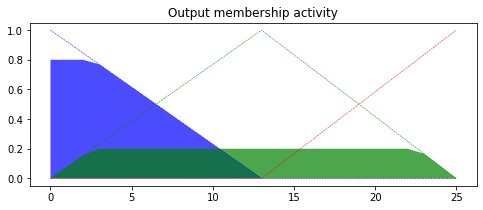

In [55]:
fig, ax0 = plt.subplots(figsize=(8, 3))
speed0 = np.zeros_like(x_speed)
#print(x_tip,tip0,tip_activation_hi)
ax0.fill_between(x_speed, speed0, finalarray[0], facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_speed, speed0, finalarray[1], facecolor='g', alpha=0.7)
ax0.plot(x_speed, speed_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_speed, speed0, finalarray[2], facecolor='r', alpha=0.7)
ax0.plot(x_speed, speed_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

Text(0.5, 1.0, 'Output membership activity')

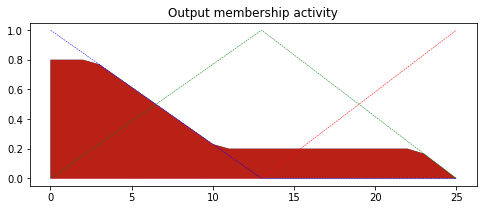

In [56]:
unionarr=np.max(finalarray,0)#union of area of method 

fig, ax0 = plt.subplots(figsize=(8, 3))
speed0 = np.zeros_like(x_speed)
#print(x_tip,tip0,tip_activation_hi)
ax0.fill_between(x_speed, speed0, unionarr, facecolor='b', alpha=0.7)
ax0.plot(x_speed, speed_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_speed, speed0, unionarr, facecolor='g', alpha=0.7)
ax0.plot(x_speed, speed_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_speed, speed0, unionarr, facecolor='r', alpha=0.7)
ax0.plot(x_speed, speed_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

In [ ]:
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisecto
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x_speed, unionarr, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(x_speed, unionarr, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()
print(defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom)